1.2 Getting data via Web scraping
------

### 1.2.1 Scraping Wikipedia page

#### 1.2.1.1 Using Wikipedia python library
**Search Wikipedia page and get page content data.**


In [5]:
# import Wikipedia python library
import wikipedia

**Search Explorer under Wikipeida. The code below is equivalent to entering Explorer in the search box at https://www.wikipedia.org/ and search. It returns page on https://en.wikipedia.org/wiki/Exploration.**

In [6]:
# access Explorer Wikipedia page
page = wikipedia.page('Explorer')

**Get plain text content of the page, excluding images, tables, and other data.**

In [7]:
#Get plain text content of the page, excluding images, tables, and other data.
content = page.content

In [8]:
#print(content)


In [9]:
# import Regular Expression python library
import re

**Clean page content remove symbols and changing line.**

In [10]:
# clean page content remove symbols and changing line
content = re.sub(r'==.*?==+', '', content)
content = content.replace('\n', '')
#print(content)

**Try a simple wordcloud with page content.**

In [11]:
# try wordcloud with page content
from wordcloud import WordCloud, STOPWORDS


**Remove stopwords and generate wordcloud content.**

In [12]:
# remove stopwords and generate wordcloud content
wordcloud = WordCloud(stopwords=STOPWORDS).generate(content)

**Plot the simple wordcloud.**

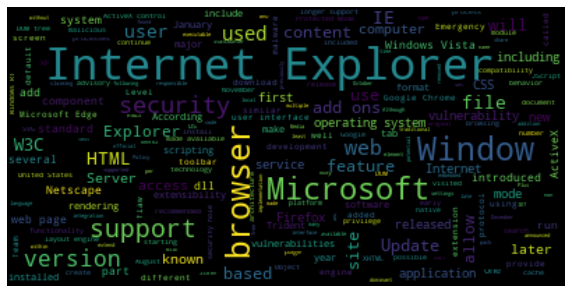

In [13]:
# import python plot graph library
import matplotlib.pyplot as plt
# show wordcloud
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 1.2.1.2 Using BeautifulSoup python library 
**Get data from Wikipedia page table via url request. Get list of explorers from https://en.wikipedia.org/wiki/List_of_explorers which contain explorer names, nationalities, centuries and main areas explored.**

In [14]:
# import BeautifulSoup and other reqired libraries
from bs4 import BeautifulSoup
import requests
import os
import codecs

In [15]:
# set Wikipedia page url to be scraped
url="https://en.wikipedia.org/wiki/List_of_explorers"


**Get page via url request.**

In [16]:
# access page via url request
wikipage = requests.get(url)

**Create BeautifulSoup object with page content.**

In [17]:
# create BeautifulSoup object with page content
soup = BeautifulSoup(wikipage.content)

**Find all tables in the page.**

In [18]:
# find all tables in the page
tables = soup.findAll("table", {"class": "wikitable"})

**Show table.**

In [ ]:
# show tables
for i, table in enumerate(tables):
    # print table number
    print("#"*10 + "Table {}".format(i) + '#'*10)
    # print first 50 text
    print(table.text[:50])
    # print divider
    print('.'*80)
print("#"*80)


**Create function to export TSVs (tab-separated values file) from Wiki page tables.** 

In [ ]:
# export CSVs from Wiki page tables
def exportWikiTB(Url, tables):
    for tn, table in enumerate(tables):

        # preinit list of lists
        rows = table.findAll("tr")
        row_lengths = [len(r.findAll(['th', 'td'])) for r in rows]
        ncols = max(row_lengths)
        nrows = len(rows)
        data = []
        for i in range(nrows):
            rowD = []
            for j in range(ncols):
                rowD.append('')
            data.append(rowD)

        # process html
        for i in range(len(rows)):
            row = rows[i]
            rowD = []
            cells = row.findAll(["td", "th"])
            for j in range(len(cells)):
                cell = cells[j]

                #lots of cells span cols and rows so lets deal with that
                cspan = int(cell.get('colspan', 1))
                rspan = int(cell.get('rowspan', 1))
                l = 0
                for k in range(rspan):
                    # Shifts to the first empty cell of this row
                    while data[i + k][j + l]:
                        l += 1
                    for m in range(cspan):
                        cell_n = j + l + m
                        row_n = i + k
                        # in some cases the colspan can overflow the table, in those cases just get the last item
                        cell_n = min(cell_n, len(data[row_n])-1)
                        data[row_n][cell_n] += cell.text
                        #print(cell.text)

            data.append(rowD)

        # write data out to tab seperated format
        page = os.path.split(url)[1]
        fname = 'output_{}_t{}.tsv'.format(page, tn)
        f = codecs.open(fname, 'w')
        for i in range(nrows):
            rowStr = '\t'.join(data[i])
            rowStr = rowStr.replace('\n', '')
            #print(rowStr)
            f.write(rowStr + '\n')

        f.close()

**Run the function to export TSV file.**

In [ ]:
exportWikiTB(url, tables)

References:
------

[Scrape Wikipedia tables by wassname](https://gist.github.com/wassname)

[Two simple ways to scrape text from Wikipedia in Python](https://levelup.gitconnected.com/two-simple-ways-to-scrape-text-from-wikipedia-in-python-9ce07426579b)